# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from api_key import weather_api_key, g_key
import scipy.stats as sts
from scipy.stats import linregress
import time
import os

## Generate Cities List

In [44]:
coordinates=[]
cities=[]

lat = np.random.uniform(-90.00,90.00,1500)
long = np.random.uniform(-180.00,180.00,1500)

coordinates = zip(lat,long)

for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    #only unique cities get added to list
    if city not in cities:
        cities.append(city)
    if len(cities) == 550:
        break
    
count_cities= len(cities)
len(cities)

550

In [45]:
cities = pd.DataFrame({"Cities":cities})
cities.head()

,Cities
0,shelburne
1,nikolskoye
2,lishui
3,ribeira grande
4,taolanaro


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
#Create DF to fill 
cities["Country"] = " "
cities["Latitude"] = 0
cities["Longitude"] = 0
cities["Cloudiness"] = 0
cities["Humidity"] = 0
cities["Max Temperature"] = 0
cities["Wind Speed"] = 0

cities.head()


,Cities,Country,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,shelburne,,0,0,0,0,0,0
1,nikolskoye,,0,0,0,0,0,0
2,lishui,,0,0,0,0,0,0
3,ribeira grande,,0,0,0,0,0,0
4,taolanaro,,0,0,0,0,0,0


In [47]:
print("Start Data Collection Process")
print()

#run a for loop to gather data - for each city in the list of cities, gather the following...
for index, row in cities.iterrows():
    
    #Build URL
    #URL for Open Weather Data will iterate through list of cities
    base_url = 'http://api.openweathermap.org/data/2.5/weather?'
    units = "Imperial"
    city_name = row["Cities"]
    print(f"Searching for {index} {city_name}")
    params = {'q': city_name, 
            'appid': weather_api_key,
            'units': units
            }
    response = requests.get(base_url, params=params).json()
    
    try:
        cities.loc[index, "Country"] = response["sys"]["country"]
        cities.loc[index, "Latitude"]  = response["coord"]["lat"]
        cities.loc[index, "Longitude"] = response["coord"]["lon"]
        cities.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities.loc[index, "Humidity"] = response["main"]["humidity"]
        cities.loc[index, "Max Temperature"] = response["main"]["temp_max"]
        cities.loc[index, "Wind Speed"] = response["wind"]["speed"]
    
    except (KeyError, IndexError):
        print("Could not find {}".format(row["Cities"]))

print()
print("Data Collection Complete")

        

Start Data Collection Process

Searching for 0 shelburne
Searching for 1 nikolskoye
Searching for 2 lishui
Searching for 3 ribeira grande
Searching for 4 taolanaro
Could not find taolanaro
Searching for 5 kasempa
Searching for 6 ipil
Searching for 7 sitka
Searching for 8 ushuaia
Searching for 9 azimur
Could not find azimur
Searching for 10 saint-philippe
Searching for 11 vardo
Searching for 12 maceio
Searching for 13 qaanaaq
Searching for 14 chokurdakh
Searching for 15 talnakh
Searching for 16 kapaa
Searching for 17 port lincoln
Searching for 18 new norfolk
Searching for 19 punta arenas
Searching for 20 te anau
Searching for 21 upernavik
Searching for 22 barra da estiva
Searching for 23 watrous
Searching for 24 castro
Searching for 25 naruto
Searching for 26 diego de almagro
Searching for 27 tasiilaq
Searching for 28 vaini
Searching for 29 pavlodar
Searching for 30 barentsburg
Could not find barentsburg
Searching for 31 kodiak
Searching for 32 pisco
Searching for 33 saskylakh
Searching

Searching for 278 tidore
Could not find tidore
Searching for 279 atar
Searching for 280 elizabeth city
Searching for 281 port macquarie
Searching for 282 mae hong son
Searching for 283 honiton
Searching for 284 tavira
Searching for 285 dwarka
Searching for 286 leningradskiy
Searching for 287 cockburn town
Searching for 288 haines junction
Searching for 289 yashkul
Searching for 290 petropavlovsk-kamchatskiy
Searching for 291 grand gaube
Searching for 292 bethel
Searching for 293 sao felix do xingu
Searching for 294 tessalit
Searching for 295 vaitupu
Could not find vaitupu
Searching for 296 north myrtle beach
Searching for 297 santiago
Searching for 298 barrow
Searching for 299 kampene
Searching for 300 dodge city
Searching for 301 markova
Searching for 302 maneadero
Searching for 303 kodinsk
Searching for 304 sanok
Searching for 305 longyearbyen
Searching for 306 fort nelson
Searching for 307 luderitz
Searching for 308 batemans bay
Searching for 309 havre-saint-pierre
Searching for 310

In [49]:
cities.count()

Cities             550
Country            550
Latitude           550
Longitude          550
Cloudiness         550
Humidity           550
Max Temperature    550
Wind Speed         550
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
output_file=os.path.join('Weather.csv')
cities.to_csv(output_file,index=False,header=True)

In [51]:
cities

,Cities,Country,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,shelburne,CA,44.08,-80.20,90,87,57.99,8.19
1,nikolskoye,RU,59.70,30.79,75,76,51.80,6.71
2,lishui,CN,28.46,119.91,45,51,93.36,3.00
3,ribeira grande,PT,38.52,-28.70,43,62,66.58,12.41
4,taolanaro,,0.00,0.00,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...
545,ossora,RU,59.24,163.07,28,67,50.16,4.14
546,punta de bombon,PE,-17.17,-71.79,96,84,60.19,7.54
547,pingyin,CN,36.28,116.45,66,28,79.18,7.99
548,visnes,NO,59.36,5.22,77,76,57.00,13.87


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
#Clean dataframe to remove cities that have humidity greater than 100 and also cities that were not found

cities1 = (cities[cities["Cloudiness"]!= 0])
cities2 = (cities1[cities1["Humidity"] < 100])

In [56]:
#  Get the indices of cities that have humidity over 100%.
cities2.count()


Cities             425
Country            425
Latitude           425
Longitude          425
Cloudiness         425
Humidity           425
Max Temperature    425
Wind Speed         425
dtype: int64

There are no cities in which the humidity is above 100%. Any cities that were not found were also removed from the analysis. The data is clean


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

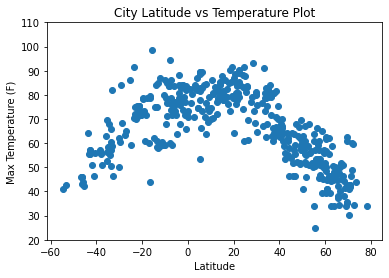

In [60]:
#Build Scatter Plot
plt.scatter(cities2["Latitude"],cities2["Max Temperature"],marker="o")
plt.title('City Latitude vs Temperature Plot')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylim(20,110)
corr=sts.pearsonr(cities2["Max Temperature"],cities2["Latitude"]);
corr
plt.savefig("Images/LatvsTemp.png")

It can been seen that the closer we are to the equator the higher the temperatures are. 

## Latitude vs. Humidity Plot

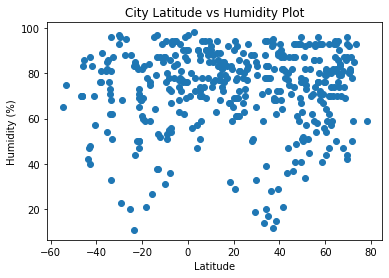

In [61]:
#Build Scatter Plot
plt.scatter(cities2["Latitude"],cities2["Humidity"],marker="o")
plt.title('City Latitude vs Humidity Plot')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
corr=sts.pearsonr(cities2["Humidity"],cities2["Latitude"]);
corr
plt.savefig('Images/LatvsHumidity')

For this specific list of cities the p-value falls below the acceptable level. We can then conclude that corealation between Latitude and Humidity are statisically significant. There is a cluster of cities that have high humidiy around the equator.

## Latitude vs. Cloudiness Plot

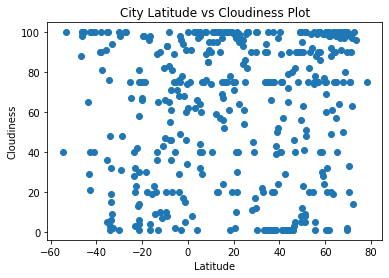

In [62]:
#Build Scatter Plot
plt.scatter(cities2["Latitude"],cities2["Cloudiness"],marker="o")
plt.title('City Latitude vs Cloudiness Plot')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
corr=sts.pearsonr(cities2["Cloudiness"],cities2["Latitude"]);
corr
plt.savefig('Images/LatvsCloudiness')

In analyzing the p-value, there is a a correlation between these two. It cna be seen that for these particular cities that cities above the equator in the northern hemisphere show more clouds than in the southern hemisphere.

## Latitude vs. Wind Speed Plot

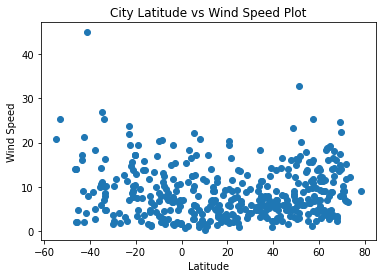

In [63]:
#Build Scatter Plot
plt.scatter(cities2["Latitude"],cities2["Wind Speed"],marker="o")
plt.title('City Latitude vs Wind Speed Plot')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
corr=sts.pearsonr(cities2["Wind Speed"],cities2["Latitude"]);
corr
plt.savefig('Images/LatvsWindSpeed')

In analyzing the p-value, there is a statistical correlation between these two.
But the wind speeds are evenly split between north and south

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [64]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Latitude"].astype(float),north["Max Temperature"].astype(float))
regress_values = north["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = -0.63x + 89.94'

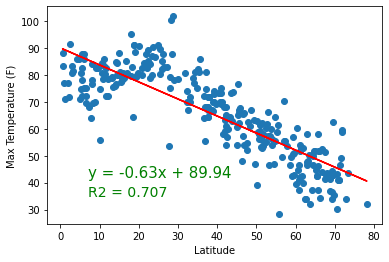

In [65]:
#Create Plot
plt.scatter(north["Latitude"],north["Max Temperature"])
plt.plot(north["Latitude"],regress_values,"red")
plt.annotate(line_eq,(7,42),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(7,35),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Images/LinRegress_TempvsLat_North')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Latitude"].astype(float),south["Max Temperature"].astype(float))
regress_values = south["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 0.66x + 81.42'

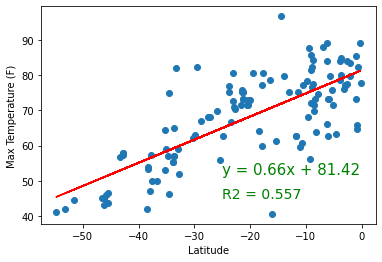

In [67]:
#Create Plot
plt.scatter(south["Latitude"],south["Max Temperature"])
plt.plot(south["Latitude"],regress_values,"red")
plt.annotate(line_eq,(-25,52),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-25,45),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Images/LinRegress_TempvsLat_South')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [68]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Latitude"].astype(float),north["Humidity"].astype(float))
regress_values = north["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = -0.03x + 74.79'

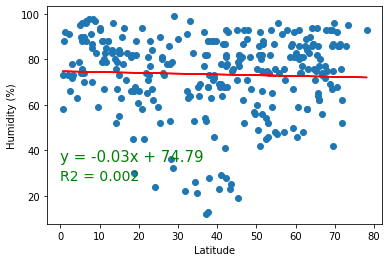

In [69]:
#Create Plot
plt.scatter(north["Latitude"],north["Humidity"])
plt.plot(north["Latitude"],regress_values,"red")
plt.annotate(line_eq,(0,35),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(0,27),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Images/LinRegress_LatvsHum_North')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [70]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Latitude"].astype(float),south["Humidity"].astype(float))
regress_values = south["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 0.08x + 73.75'

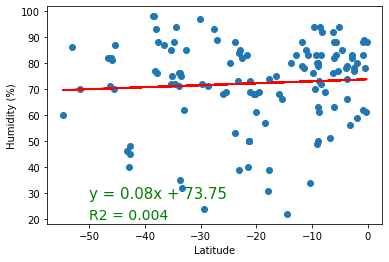

In [71]:
#Create Plot
plt.scatter(south["Latitude"],south["Humidity"])
plt.plot(south["Latitude"],regress_values,"red")
plt.annotate(line_eq,(-50,28),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,20),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Images/LinRegress_LatvsHum_South')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [72]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Latitude"].astype(float),north["Cloudiness"].astype(float))
regress_values = north["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 0.03x + 60.81'

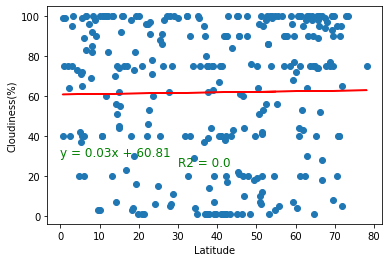

In [73]:
#Create Plot
plt.scatter(north["Latitude"],north["Cloudiness"])
plt.plot(north["Latitude"],regress_values,"red")
plt.annotate(line_eq,(0,30),color="green",fontsize=12)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(30,25),fontsize=12,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('Images/LinRegress_LatvsCloud_North')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [74]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Latitude"].astype(float),south["Cloudiness"].astype(float))
regress_values = south["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = -0.39x + 44.19'

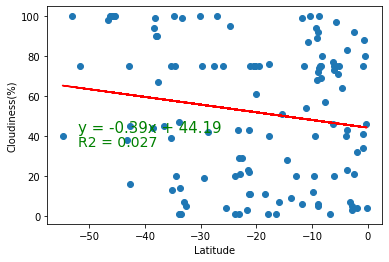

In [75]:
#Create Plot
plt.scatter(south["Latitude"],south["Cloudiness"])
plt.plot(south["Latitude"],regress_values,"red")
plt.annotate(line_eq,(-52,42),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-52,35),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('Images/LinRegress_LatvsLat_South')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [76]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Latitude"].astype(float),north["Wind Speed"].astype(float))
regress_values = north["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = 0.05x + 6.23'

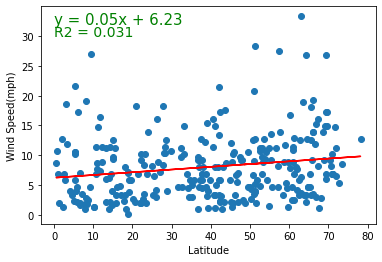

In [77]:
#Create Plot
plt.scatter(north["Latitude"],north["Wind Speed"])
plt.plot(north["Latitude"],regress_values,"red")
plt.annotate(line_eq,(0,32),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(0,30),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig('Images/LinRegress_LatvsWind_North')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [78]:
#Line Equation
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Latitude"].astype(float),south["Wind Speed"].astype(float))
regress_values = south["Latitude"]*slope +intercept
line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
line_eq

'y = -0.08x + 7.67'

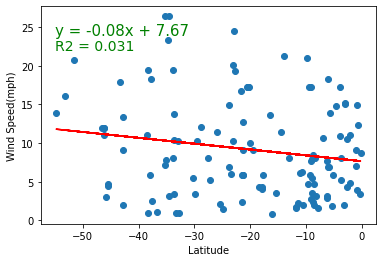

In [79]:
#Create Plot
plt.scatter(south["Latitude"],south["Wind Speed"])
plt.plot(south["Latitude"],regress_values,"red")
plt.annotate(line_eq,(-55,24),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-55,22),fontsize=14,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig('Images/LinRegress_LatvsWind_South')